# Python Project - (Prosper Loan Data)
## by (Ejike Okenu)






## Introduction
> The data of observation explores 113066 rows and 81 columns containing categorical and quantitaive data which help to describe a demographic of borrowers and their loan status for the Prosper Loan company between the duratio  of 2005 to 2014.
The main feature of interest in this dataset is the Loan status and how we can predict the best demographic or consumer group to provide loans in other to ensure profit and curb loss for the company.
This Exploration is aimed at getting observing the current status of all loans approved over this period and find a trend for the number of loans given out across the observation period. I aslo aim to investigate the major group benefitting from the loan program as regards their employment status.


> To give better insight of what demographic of customers would have benefitted the most from all approved loans over this period, we are seeking to expore the relationship between the Loan Status, Emplyment status of the customers for the duration of 2005-2014. I also intend to explore the Borrower's income satus, the preferred loan term payback duration of loans that were given out and the predictability success rate of the company's effective yield.

## Preliminary Wrangling

In [2]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in the dataset for wrangling and exploration.
df=pd.read_csv('ProsperLoanData.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss



>**Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot data.

In [6]:
#Converted the ListingcreationDate Variable to a Datetime variable 
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate, errors='coerce')

In [7]:
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Completed,14/08/2009 0:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [8]:
#duplicate values were removed using listing number as unique identifier. 
df.drop_duplicates(subset=['ListingNumber'], keep='first', inplace= True, ignore_index=True)

In [9]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26,C,36,Completed,14/08/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05,HR,36,Completed,17/12/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113061,E6D9357655724827169606C,753087,2013-04-14,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113062,E6DB353036033497292EE43,537216,2011-11-03,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113063,E6E13596170052029692BB1,1069178,2013-12-13,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113064,E6EB3531504622671970D9E,539056,2011-11-14,NaN,60,Completed,13/08/2013 0:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [15]:
#Grouped the Load Status column by Assigning the 'Defaulted' entry to all borrowers who were overdue to get them in a group
df.loc[df['LoanStatus']=='Past Due (91-120 days)','LoanStatus']='Defaulted'
df.loc[df['LoanStatus']=='Past Due (61-90 days)','LoanStatus']='Defaulted'
df.loc[df['LoanStatus']=='Past Due (31-60 days)','LoanStatus']='Defaulted'
df.loc[df['LoanStatus']=='Past Due (16-30 days)','LoanStatus']='Defaulted'
df.loc[df['LoanStatus']=='Past Due (1-15 days)','LoanStatus']='Defaulted'
df.loc[df['LoanStatus']=='Past Due (>120 days)','LoanStatus']='Defaulted'


In [16]:
df.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  7075
FinalPaymentInProgress      203
Cancelled                     5
Name: LoanStatus, dtype: int64

In [45]:
df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [17]:
#gROUPED THE Employment _Status  and IncomeRange Variable entries into category groups for better visualization.
df.loc[df['EmploymentStatus']=='Full-time','EmploymentStatus']='Employed'
df.loc[df['EmploymentStatus']=='Self-employed','EmploymentStatus']='Employed'
df.loc[df['EmploymentStatus']=='Part-time','EmploymentStatus']='Employed'
df.loc[df['EmploymentStatus']=='Other','EmploymentStatus']='Not available'
df.loc[df['IncomeRange']=='$0','IncomeRange']='Not employed'

In [18]:
df.EmploymentStatus.value_counts()

Employed         100092
Not available      9089
Not employed        835
Retired             795
Name: EmploymentStatus, dtype: int64

**What is the most preferred loan term duration by borrowers?**

Text(0.5, 0, 'Term(months)')

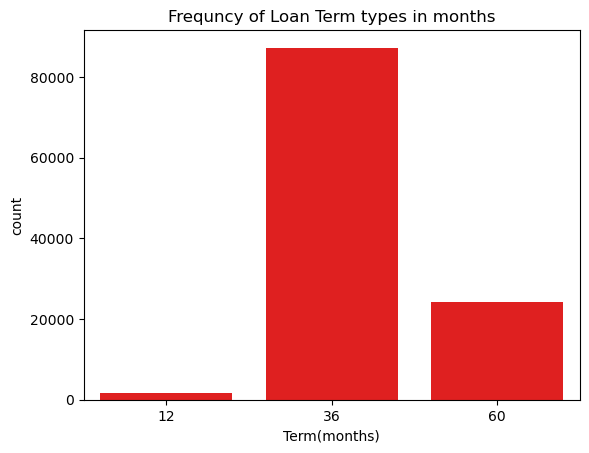

In [59]:
#Visualizing the types of loan term types according to frequent they were patronized by borrowers
sns.countplot(data=df,x= 'Term', color= 'red');
plt.title('Frequncy of Loan Term types in months')
plt.xlabel('Term(months)')

**OBSERVATION:**
We can infer from the above chart distribution that most of the customers prefer their loan 
repaymnet plan spread out over a 3 Year period(36Months) and almost tripples the request for the other two loanterm 
options.The Five(60 Months) year loan term plan comes in second favorite option by the borowers accounting for about 2500 
of total loans in the study period with the 12 months loan term plan being the least preferred option as it most likely 
doenst give the borrowers enought time to repay their debts.

**What Is the Current status of all the loans given for the period of observation.**

Text(0.5, 0, 'Loan Status')

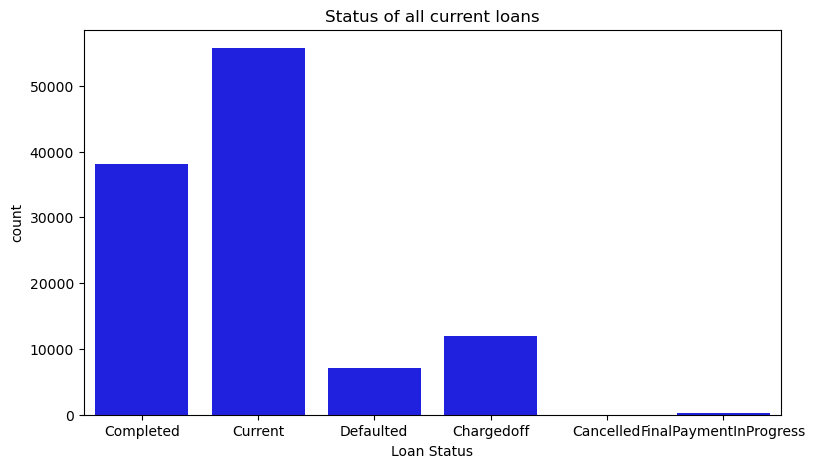

In [19]:
#Visualizing the current status of all loans awarded since 2005 to 2014
plt.figure(figsize=[9,5])
sns.countplot(data=df,x= 'LoanStatus', color= 'blue');
plt.title('Status of all current loans')
plt.xlabel('Loan Status')

**OBSERVATION:**
For this analysis, we had to group the Borrowers who had overdue days in thier payment into the 'Defualted' group.
The company had charged off over 10000 loans for the observation period accounting for 1% of the total loans given in 
the observation duration. The total number of loans completed is below 40000(0.38%) of the total loans issued although the 
number might still increase significantly if the current loan is serviced appropiately as this category accounts for the 
highest number in the group.

**What is the number of Loans given out per year for the observation period.**

In [20]:
#Extracted the year from the ListingCreationDate column for analysis.
df['ListingYear']=pd.DatetimeIndex(df['ListingCreationDate']).year

In [94]:
df['ListingYear'].value_counts()

2013    34791
2012    19556
2007    11557
2011    11442
2008    11263
2014    10485
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingYear, dtype: int64

Text(0, 0.5, 'No. Of Loans')

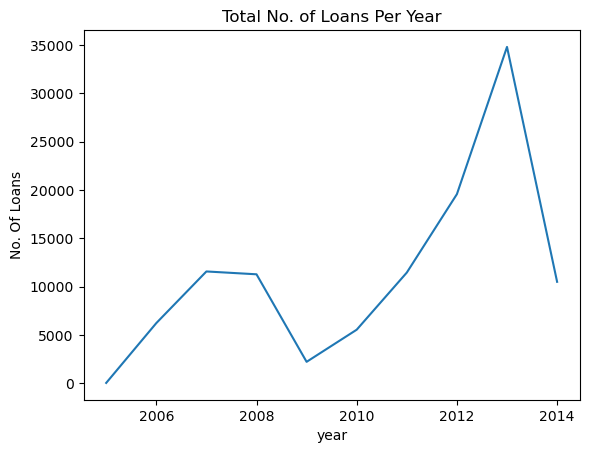

In [145]:
##Visualized the No of loans Given out per year since 2005
count_of_years = df['ListingYear'].value_counts().rename_axis('year').reset_index(name='counts')
df_count = pd.DataFrame(count_of_years)
df_count = df_count.sort_values(by=['year'])
sns.lineplot(x="year", y="counts", data=df_count)
plt.title('Total No. of Loans Per Year')
plt.ylabel('No. Of Loans')


**OBSERVATION:**
    Looking at the line graph plotted above, it is clear that the compans'y loan given out increased showing linear growth
    from the first year of observation but took a hit in 2009 bringing the company's loan number to its lowest point.
    For some reason the company's loan numbers dip every 5 years as seen in 2009 and 2014. Futher investigation and 
    investment should be made to avert the dip in the coming years. 

**What Borrowers Income Range accounts for the most amount of loans requested.**

Text(0.5, 1.0, 'Customers Income Range from 2005-2014')

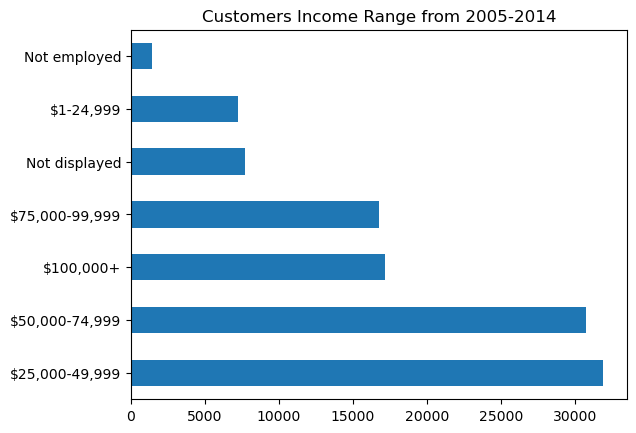

In [21]:
# PLotted the various income categories of the current borrowers after regrouping borrowers with $0 income to not employed 
# Earlier applied in the analysis using (df.loc[df['IncomeRange']=='$0','IncomeRange']='Not employed')
df['IncomeRange'].value_counts().plot(kind='barh')
plt.title('Customers Income Range from 2005-2014')

**OBSERVATION:**
The chart above illustrates the different income range categories of all the current borrowers with the 25000-49,999 dollars range accounting for the most of our borrowers with the 50000-74,999 dollars coming a close second in the observation.
We can also conclude that futher dividing the income range into two groups "High income"= More than 50,000 dollars and "Low Income" =Less than 50,000 dollars, we can estimate that most of our borrowers are in the high income category with a ratio of 0.55:036 respectively.
*PS:We also had to group the income range of borrowers who earned '0$' into the 'Not employed' category for this analysis.*

**What is the employment status of the current borrowers group in the study.**

Text(0.5, 0, 'EmploymentStatus')

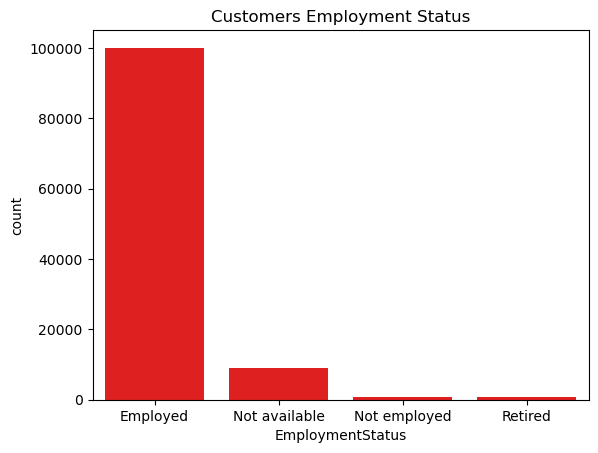

In [22]:
sns.countplot(data=df,x= 'EmploymentStatus', color= 'red');
plt.title('Customers Employment Status')
plt.xlabel('EmploymentStatus')

**OBSERVATION:**
*Note: For this observation, and adjustment was made to the variables to better group them into categories for better analysis. The Borrowers who filled their employment status as 'Full-time','Part-Time' and 'Self-Employed' were all grouped under the employed category as their entries indicated they were employed.*

The above illustration shows the majority of our borrowers were employed at the time the loan was granted to them and hence loan repayment should be easy defaults should not be expected in the initial repayment stages. The retired and Not employed category both accounted or less than 2% of the total number while the other 8% where borrowers whose employment status were unknown and unverifiable.
    

**How much of the borrowers income were verified before loan was approved**

<AxesSubplot:ylabel='IncomeVerifiable'>

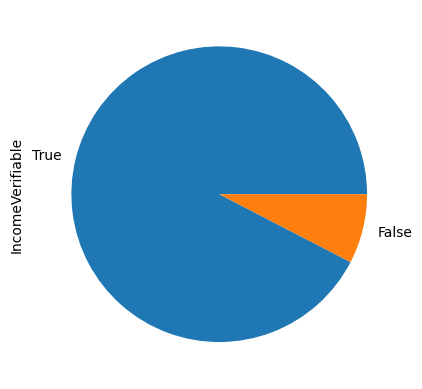

In [23]:
df['IncomeVerifiable'].value_counts().plot.pie()


**OBSERVATION:**
We can see from the above illustration that a large number of our customers income were verified before loans were granted to them. This stat shows that most of our customers income were verified and this number should reduce the number of bad debts and loan repayment defaulters.

**What amount of loan has mostly been approved for the borrowers?**


Text(0, 0.5, 'Frequency')

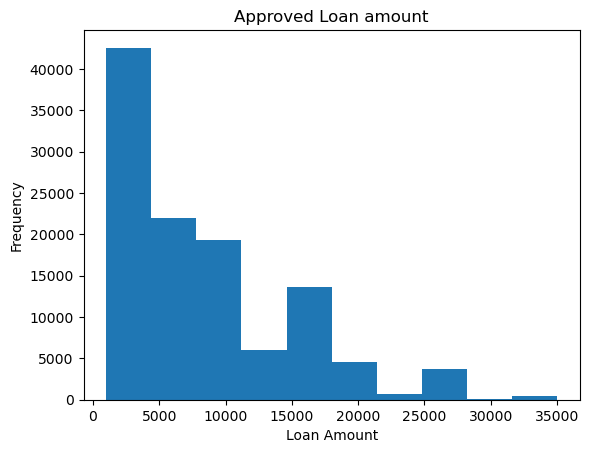

In [24]:
plt.hist(data=df,x='LoanOriginalAmount');
plt.title('Approved Loan amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

**Observation**
The above chart shows that moajority of the approved loans for the custmomers fall between 2000 to 11000 dollars with loans above $22000 accounting for a very little number. This information is helpful as it lets us know that majority of the loans which fall under low category are spread over a 36 and 60 months loan term period as illustrated in an earlier distribution hence making the loans more serviceable and easy to repay.

## **Summary Of Findings:**
We have been able to establish that the most frequently approved loan amount fell between $2000-$5000. We were also have seen that due diligence is mostly always taken to the tune of about 85% to validate borrowers reported income in order to mitigate the chances of defualted and bad loans. The majority of pproved loans also have been established to go to customers who are employed with majority of this group earning above the average income of $50,000 hence loan servicing should is expected to go smoothly for the majority of loans. We also noticed majority of the customers preferred to spread their loan over a 36 months pay period which is a balance between the other options which are 5 years and 1 year respectively.

*Please note: The EmploymentStatus Column was not properly distributed. It had a couple of entries that were broken down and would not have given accurate insight on the data. For example Numerous columns contained EmploymentStatus as Part-Time, Full-time and self employed and all this still fall under the employed category and had to be grouped into this category there by increasing the number of rows for the employed entry. We aslo grouped the 'Other' entry in this variable together with the 'Not available' entry to depict whose employement status we were not certain of. 
Due to the insiginificance of some of the columns in the loan status column, we had to group these columns under the default entry as they all convey the same message that the borrowers did not pay their lon as at when due.*

**What is the Loan status across by year between 2005 to 2014**

Text(0, 0.5, 'Loan Status')

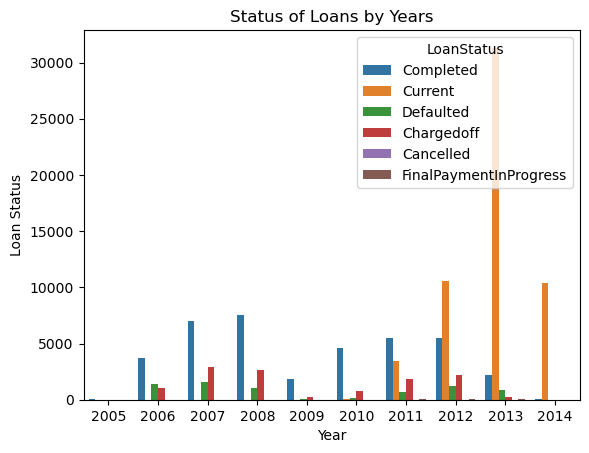

In [25]:
#Plotted chart to illustrate the status of all loans across the years.
sns.countplot(data=df,x='ListingYear',hue='LoanStatus');
plt.title('Status of Loans by Years')
plt.xlabel( 'Year')
plt.ylabel('Loan Status')

**OBSERVATION:**
Studying the chart above shows that in 2007 and 2008, the company had a lot of defualters and bad debts when compared relatively to the other years. 2010 however had the best loan completion status with the total defaulters and chargedoff debts being very little. We are unable to accurately tell at this time if the years 2011-2014 would have better loan completion ratios as majority of the loans under these years are still current with payments still being made.

**Show the relationship between borrowers whose income were verified and the Loan status.**

Text(0, 0.5, 'Verifiable Income')

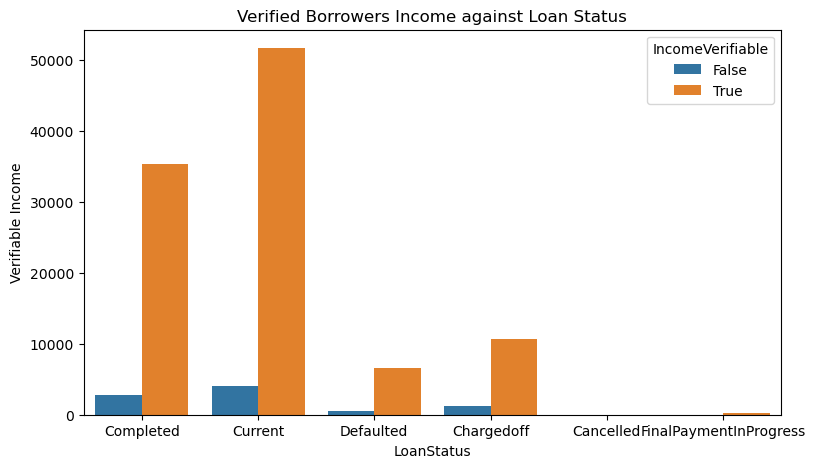

In [26]:
#Chart to illustrate Veriafiable income by Loan status.
plt.figure(figsize=[9,5])
sns.countplot(data=df,x='LoanStatus',hue='IncomeVerifiable');
plt.title('Verified Borrowers Income against Loan Status')
plt.ylabel('Verifiable Income')

**OBSERVATION:**
We can deduce from the chart above that customers whose income were verifiable had a higher chance of completing their loan payments when compared to borrowers whose income weren't. The percentage of this values for each loan status sat at approximately 10% for Completed loan status and 16% and 12% respectively for the Chargedoff and Defaulted loan status respectively. 

**Show the relationship between Loaned amount and Amounts paid by the borrowers.**

Text(0, 0.5, 'Customer Payments')

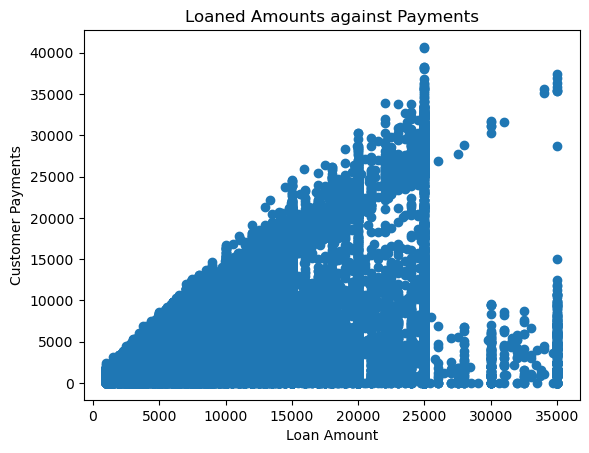

In [152]:
plt.scatter(data=df, x= 'LoanOriginalAmount', y= 'LP_CustomerPayments');
plt.title('Loaned Amounts against Payments')
plt.xlabel( 'Loan Amount')
plt.ylabel('Customer Payments')



**OBSERVATION:**
The above scatter plot indicates how well the approved loans are faring as regards amount paid by the borrowers. Most of the Customers have been seen to have paid their loans as there is a positive correlation between both variables. However some customers have been noticed to be off the positive corellation line indicating customers who are defaulting or whose loans have been charged off which is much less than the majority. 

**What has been the Estimated Return over the years.**

<AxesSubplot:xlabel='ListingYear', ylabel='EstimatedEffectiveYield'>

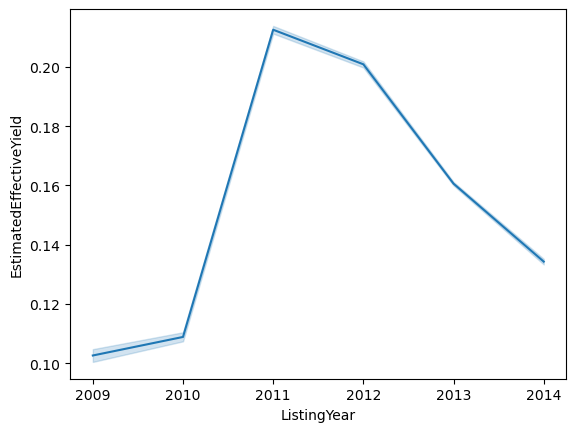

In [176]:
#sns.lineplot(x="ListingYear", y="CurrentDelinquencies", data=df)
sns.lineplot(x="ListingYear", y="EstimatedEffectiveYield", data=df)


**OBSERVATION:**
The estimated return for loans awarded over the time period can be seen to have positively progressed from the year 2009 up until 2011 where it starts to decline rapidly. This can be related to the fact that most of the loans from 2011-2014 are still in the current status(2013 having the most significant number of issued loans) with customers having a long duration of payment spread out across 3-5years which explains the decline.

## **Summary and Key Findings:**

This exploration has establsihed that borrowers whose income are verifiable the major beneficairies of the loans from Prosper company. We can also conclude that a customers employment status has a huge impact in apporval of their loans in other to limit bad debts and defaults which will lead to a loss for the company as this is quite evident in the amount of loans granted to retirees and the unemployed. 
We were also able to draw a pattern that shows the company has a loan approval/granting decline rate for every 5 year period as seen in 2009 and 2014.

This exploration has also shown us that a linear relationship exists between customers approved loan and their payments. Which means the more loan a customer gets the more money he has to pay up.

We also deduced the decline in the company's yield after the year 2011 where it peaked as majority of the loans after this period were still in the current state and still being serviced as compared to the previous years were the loans had been completed with all yields accumulated.
